## NAME: Pradyumna Revur
# CSCI S-89 DEEP LEARNING
# ASSIGNMENT 1

### Problem 2 (20 points)
Construct the Neural Network you used in Problem 1 without using any packages for NN optimization. Implement Backpropagation “manually” and plot the test and train errors.

### SOLUTION:

## `Based on example from https://pyimagesearch.com/2021/05/06/backpropagation-from-scratch-with-python/`

<class 'pandas.core.frame.DataFrame'>
Index: 24563 entries, 0 to 24563
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bedrooms   24563 non-null  int64  
 1   floorArea  24563 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 575.7 KB


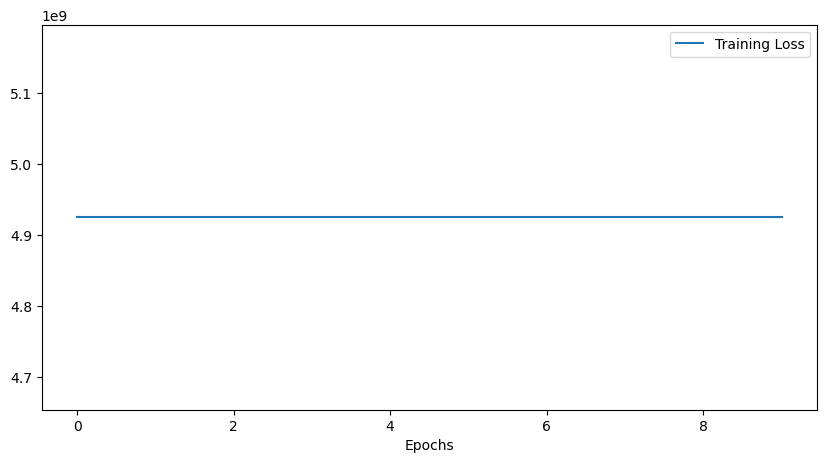

In [2]:
import math

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Parse data into data frame
df_housing = pd.read_csv('data/Housing_Data.csv', usecols=['bedrooms', 'floorArea', 'value'],
                         converters={'bedrooms': lambda x: pd.to_numeric(x, errors='coerce'),
                                     'floorArea': lambda x: pd.to_numeric(x, errors='coerce') / 1000,
                                     'value': lambda x: pd.to_numeric(x, errors='coerce') / 100000})
X = df_housing[['bedrooms', 'floorArea']].copy()
y = df_housing['value'].copy()
# drop missing data
X = X.dropna()
y = y.loc[X.index]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# split 80/20 into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X.info()

## end of data prep

# train function takes inputs X
# with corresponding expected outputs y
def fit(W, X, y, epochs=10):
    # add bias column initialized with ones to weight matrix
    X = np.c_[X, np.ones((X.shape[0]))]
    # loop over the desired number of epochs
    history = {}
    for epoch in np.arange(0, epochs):
        # loop over each individual data point and train
        # our network on it

        #for stochastic - pick one input randomly
        idx = np.random.choice(len(X))
        for (x, target) in zip(X, y):
            fit_partial(W, x, target)
            # display a training update
        loss = calculate_loss(W, X, y)
        history[epoch] = loss
    return history


def fit_partial(W, x, y):
    # construct our list of output activations for each layer
    A = [np.atleast_2d(x)]

    # FEEDFORWARD:
    # loop over the layers in the network
    for layer in np.arange(0, len(W)):
        net = A[layer].dot(W[layer])
        out = vectorized_relu(net)
        A.append(out)

    # BACKPROPAGATION
    error = A[-1] - y
    D = [2 * error]  # epsilon2 = 2(y_hat -y) for relu

    for layer in np.arange(len(A) - 2, 0, -1):
        delta = D[-1].dot(W[layer].T)
        delta = delta * vectorized_grad_relu(A[layer])
        D.append(delta)

    # reverse the deltas
    D = D[::-1]
    # WEIGHT UPDATE PHASE
    # loop over the layers
    for layer in np.arange(0, len(W)):
        # update weights
        learning_rate = 0.1
        W[layer] += -learning_rate * A[layer].T.dot(D[layer])


def predict(W, X, addBias=True):
    p = np.atleast_2d(X)
    # check to see if the bias column should be added
    if addBias:
        p = np.c_[p, np.ones((p.shape[0]))]
    # loop over our layers in the network
    for layer in np.arange(0, len(W)):
        p = vectorized_relu(np.dot(p, W[layer]))
    # return the predicted value
    return p


def calculate_loss(W, X, targets):
    targets = np.atleast_2d(targets)
    predictions = predict(W, X, addBias=False)
    loss = 0.5 * np.sum((predictions - targets) ** 2)
    return loss


def rms_loss(y_true, y_pred):
    return math.sqrt((y_true - y_pred) ** 2)


def relu(x):
    if x <= 0:
        return 0
    return x


def grad_relu(x):
    """
    first derivative of relu activation f(x) at x
    :param x: input value where f'(x) is evaluated
    :return: f'(x) = x > 0 ? 1 : 0
    """
    if x > 0:
        return 1
    return 0


vectorized_relu = np.vectorize(relu)
vectorized_grad_relu = np.vectorize(grad_relu)

W = []  # weight matrix

# setup input layer with 2 nodes,
# hidden layer with 2 nodes and output layer with one node
layers = [2, 2, 1]

# initialize weight matrix by randomly
# sampling values from a standard, normal distribution
w = np.random.randn(layers[0] + 1, layers[0 + 1] + 1)
W.append(w / np.sqrt(layers[0]))
w = np.random.randn(layers[-2] + 1, layers[-1])
W.append(w / np.sqrt(layers[-2]))

history = fit(W, X_train, y_train)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.values(), label='Training Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()
